In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('TCS1.CSV')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [4]:
df.shape

(4494, 7)

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

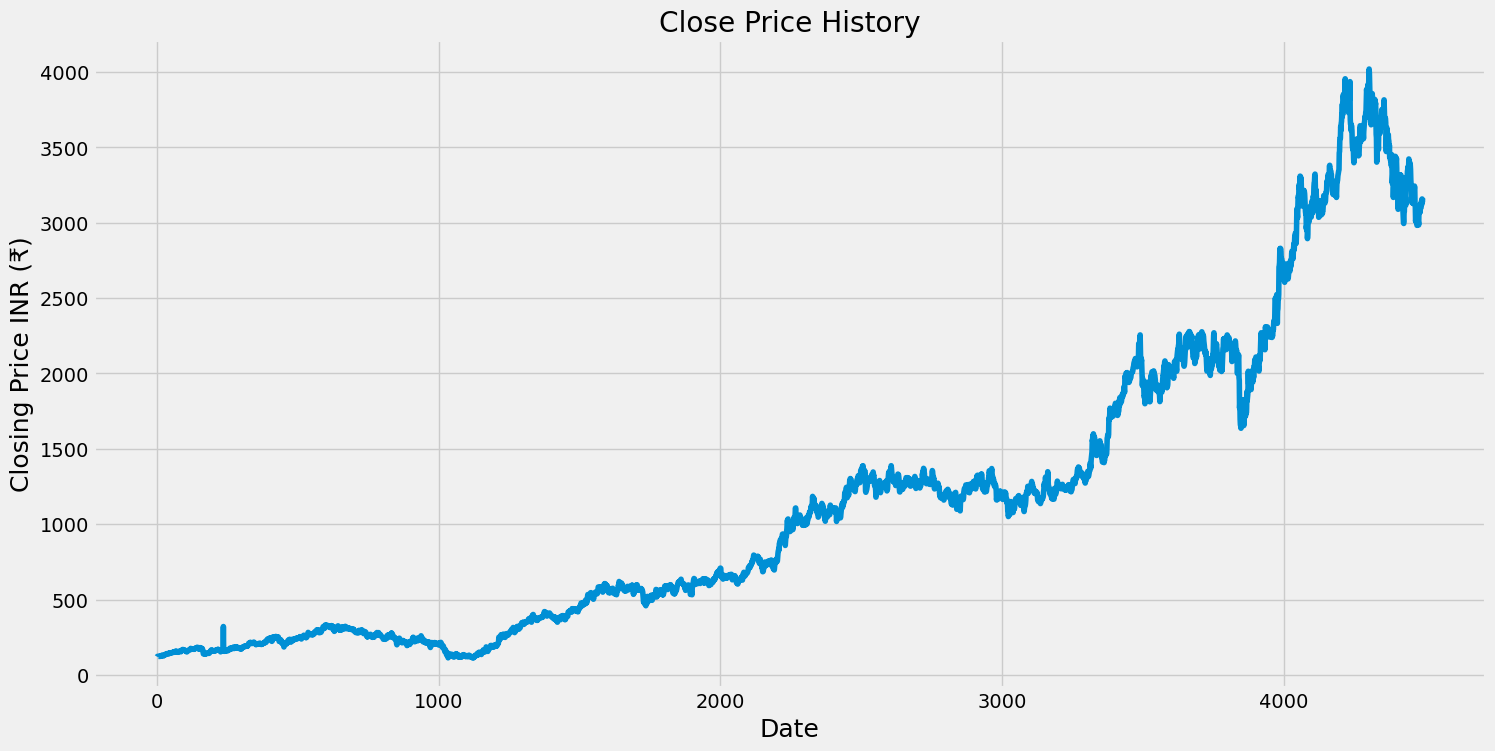

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price INR (₹)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

#Convet the dataframe to numpy array
dataset = data.values

#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)
training_data_len


3589

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

In [10]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :] 

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
    

[array([0.00224754, 0.00301848, 0.00306134, 0.00305494, 0.0032392 ,
       0.00337355, 0.00327759, 0.00330126, 0.00324048, 0.00280095,
       0.00308373, 0.00355397, 0.00394296, 0.00363714, 0.00371264,
       0.00422574, 0.00417456, 0.0049071 , 0.00510736, 0.00441   ,
       0.00436329, 0.0041061 , 0.00393976, 0.00443367, 0.00430891,
       0.00496788, 0.00588916, 0.00602352, 0.00605231, 0.00654814,
       0.00657885, 0.00629862, 0.00614379, 0.00715912, 0.00747262,
       0.00783281, 0.00802283, 0.00770486, 0.00745854, 0.00745854,
       0.00719623, 0.00783089, 0.00791726, 0.00875089, 0.0084406 ,
       0.00890124, 0.00855064, 0.00904647, 0.00889293, 0.0087349 ,
       0.00933309, 0.00946873, 0.00965938, 0.00972016, 0.00973615,
       0.00973615, 0.0095487 , 0.01001254, 0.01083146, 0.01038681])]
[0.010558269287128972]

[array([0.00224754, 0.00301848, 0.00306134, 0.00305494, 0.0032392 ,
       0.00337355, 0.00327759, 0.00330126, 0.00324048, 0.00280095,
       0.00308373, 0.00355397, 0.0

In [11]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3529, 60, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3529/3529 ━━━━━━━━━━━━━━━━━━━━ 60s 16ms/step - loss: 5.2239e-04


In [16]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [17]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#Get the models predicted price values
# Make predictions
predictions = model.predict(x_test)

# Handle NaN values in the predictions
predictions = np.nan_to_num(predictions, nan=np.nanmean(predictions))

# Convert the predictions back to the original scale
predictions = scaler.inverse_transform(predictions)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [20]:
print(x_test)
print(predictions)

[[[0.48327619]
  [0.48757552]
  [0.47882332]
  ...
  [0.48023084]
  [0.48317382]
  [0.48667983]]

 [[0.48757552]
  [0.47882332]
  [0.4806531 ]
  ...
  [0.48317382]
  [0.48667983]
  [0.48908537]]

 [[0.47882332]
  [0.4806531 ]
  [0.48181751]
  ...
  [0.48667983]
  [0.48908537]
  [0.4870637 ]]

 ...

 [[0.78294863]
  [0.78186101]
  [0.76884788]
  ...
  [0.76778587]
  [0.77621815]
  [0.7703706 ]]

 [[0.78186101]
  [0.76884788]
  [0.78751668]
  ...
  [0.77621815]
  [0.7703706 ]
  [0.77944266]]

 [[0.76884788]
  [0.78751668]
  [0.80585272]
  ...
  [0.7703706 ]
  [0.77944266]
  [0.77434998]]]
[[2041.5646]
 [2046.1073]
 [2049.459 ]
 [2051.4536]
 [2050.7073]
 [2046.8612]
 [2050.1082]
 [2053.277 ]
 [2056.1182]
 [2057.223 ]
 [2055.9797]
 [2050.6326]
 [2044.0157]
 [2035.5264]
 [2032.3651]
 [2036.6932]
 [2050.9785]
 [2067.6492]
 [2073.273 ]
 [2078.4187]
 [2085.6672]
 [2095.8313]
 [2097.9805]
 [2093.2598]
 [2085.3137]
 [2091.9434]
 [2106.611 ]
 [2125.703 ]
 [2145.7632]
 [2162.314 ]
 [2179.1587]
 [2

In [21]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

70.15738778116935

C:\Users\MSI\AppData\Local\Temp\ipykernel_12420\3004861591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


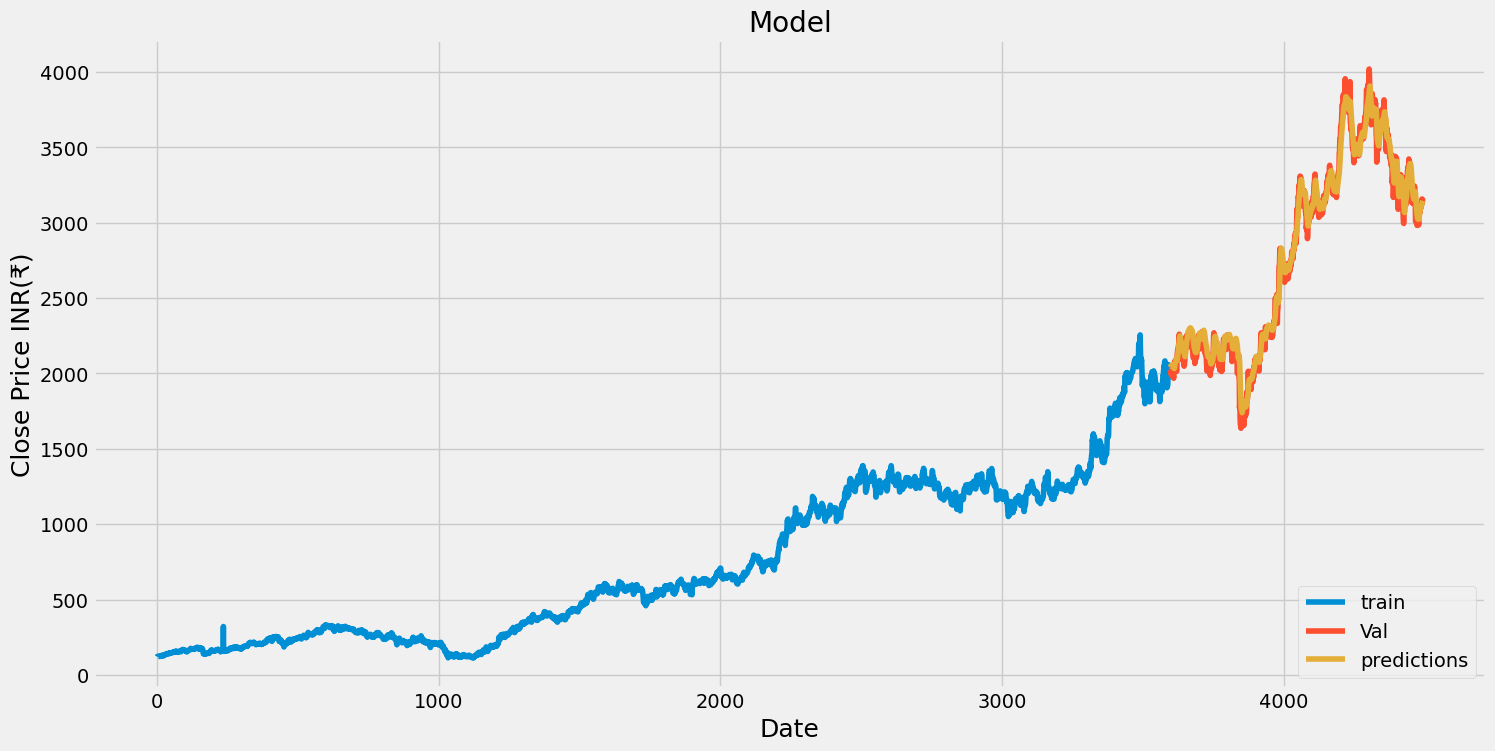

In [22]:
#Plot the data
train = data [:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train','Val', 'predictions'], loc='lower right')
plt.show()

In [23]:
#Show the valid and predicted prices
valid

,Close,Predictions
3597,2022.699951,2041.564575
3598,2014.800049,2046.107300
3599,2012.449951,2049.458984
3600,2000.500000,2051.453613
3601,1987.400024,2050.707275
...,...,...
4489,3144.699951,3115.689941
4490,3121.850098,3124.695801
4491,3157.300049,3130.282227
4492,3137.399902,3139.429199


In [24]:
# Read the entire CSV file
tcs = pd.read_csv('TCS1.CSV')

# Convert the 'Date' column to datetime format
tcs['Date'] = pd.to_datetime(tcs['Date'])

# Define the desired date range
start_date = '2012/01/02'
end_date = '2019/12/17'

# Filter the DataFrame to include only rows within the date range
tcs_filtered = tcs[(tcs['Date'] >= start_date) & (tcs['Date'] <= end_date)]

new_df = tcs_filtered.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[2122.6287]]


In [25]:
# Read the entire CSV file
tcs = pd.read_csv('TCS1.CSV')

# Convert the 'Date' column to datetime format
tcs['Date'] = pd.to_datetime(tcs['Date'])

# Define the desired date range
start_date = '2019/12/18'
end_date = '2019/12/18'

# Filter the DataFrame to include only rows within the date range
tcs_filtered1 = tcs[(tcs['Date'] >= start_date) & (tcs['Date'] <= end_date)]
print(tcs_filtered1['Close'])

3785    2167.75
Name: Close, dtype: float64
